In [2]:
#load lib
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score,precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from xgboost import XGBClassifier
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
#set working directory 
os.chdir("C:/Users/HP/Desktop/Bank Project")

In [4]:
#load data
bankdata= pd.read_csv("bank-loan.csv")

In [5]:
# check data type
bankdata.dtypes

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object

In [6]:
bankdata.nunique()

age          37
ed            5
employ       33
address      32
income      129
debtinc     245
creddebt    842
othdebt     848
default       2
dtype: int64

     change datatype of some variables


In [7]:
#change data type
bankdata['ed'] = bankdata['ed'].astype('category')

In [8]:
bankdata.describe()

,age,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


### Missing value analysis ###

In [7]:
#missing value
print(bankdata.isnull().sum())

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64


In [8]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(bankdata.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_Percentage'})

#Calculate percentage
missing_val['Missing_Percentage'] = (missing_val['Missing_Percentage']/len(bankdata))*100

#descending order
missing_val = missing_val.sort_values('Missing_Percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Perc_of_MV.csv", index = False)

In [9]:
missing_val


,Variables,Missing_Percentage
0,default,17.647059
1,age,0.000000
2,ed,0.000000
3,employ,0.000000
4,address,0.000000
5,income,0.000000
6,debtinc,0.000000
7,creddebt,0.000000
8,othdebt,0.000000


### Now impute missing value by taking mode of column 'default'

In [10]:
impute_val =bankdata['default'].mode()

In [11]:
impute_val

0    0.0
dtype: float64

In [12]:
bankdata['default']=bankdata['default'].fillna(0)

In [13]:
bankdata

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
845,34,1,12,15,32,2.7,0.239328,0.624672,0.0
846,32,2,12,11,116,5.7,4.026708,2.585292,0.0
847,48,1,13,11,38,10.8,0.722304,3.381696,0.0
848,35,2,1,11,24,7.8,0.417456,1.454544,0.0


In [14]:
bankdata.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

### Outlier analysis ###

In [15]:
num_cname=['age','employ','address','income','debtinc','creddebt','othdebt']

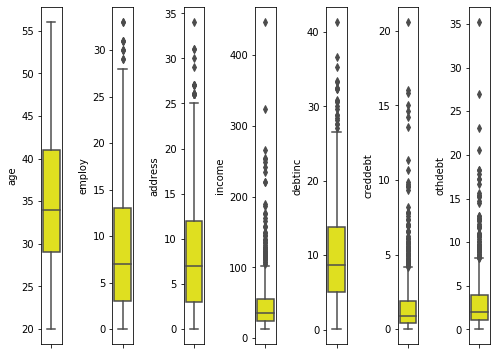

In [16]:
l= num_cname
number_of_columns = 7
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize = (number_of_columns, 5*number_of_rows))
for i in range(0, len(l)):
    plt.subplot(number_of_rows + 1, number_of_columns, i+1)
    sb.boxplot(bankdata[l[i]], color = 'yellow', orient = 'v')
    plt.tight_layout()

In [17]:
for i in num_cname:
    #print(i)
    q75, q25 = np.percentile(bankdata.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    #print(min)
    #print(max)
  
    bankdata = bankdata.drop(bankdata[bankdata.loc[:,i] < min].index)
    bankdata = bankdata.drop(bankdata[bankdata.loc[:,i] > max].index)

In [18]:
bankdata

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
5,41,2,5,5,25,10.2,0.392700,2.157300,0.0
7,43,1,12,11,38,3.6,0.128592,1.239408,0.0
...,...,...,...,...,...,...,...,...,...
844,23,1,3,4,13,3.1,0.045539,0.357461,0.0
845,34,1,12,15,32,2.7,0.239328,0.624672,0.0
847,48,1,13,11,38,10.8,0.722304,3.381696,0.0
848,35,2,1,11,24,7.8,0.417456,1.454544,0.0


### Feature selection ###

In [19]:
corr_matrix = bankdata.loc[:,num_cname].corr()
print(corr_matrix)

               age    employ   address    income   debtinc  creddebt   othdebt
age       1.000000  0.459488  0.574834  0.483895 -0.074520  0.168996  0.226116
employ    0.459488  1.000000  0.288116  0.624433 -0.213998  0.145147  0.205179
address   0.574834  0.288116  1.000000  0.279700 -0.049478  0.140302  0.116272
income    0.483895  0.624433  0.279700  1.000000 -0.246929  0.296365  0.366226
debtinc  -0.074520 -0.213998 -0.049478 -0.246929  1.000000  0.543457  0.666845
creddebt  0.168996  0.145147  0.140302  0.296365  0.543457  1.000000  0.468420
othdebt   0.226116  0.205179  0.116272  0.366226  0.666845  0.468420  1.000000


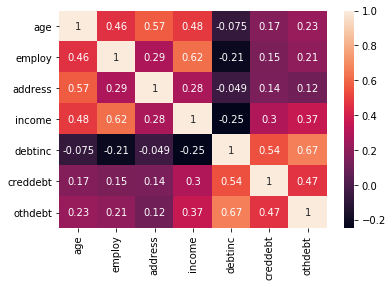

In [20]:
sb.heatmap(corr_matrix, annot=True)

### Feature scaling ###

In [21]:
for i in num_cname:
    bankdata[i] = pd.to_numeric(bankdata[i], downcast='float')
    

In [22]:
#Nomalisation
for i in num_cname:
    #print(i)
    min = bankdata[i].min()
    max = bankdata[i].max()
    bankdata[i] = (bankdata[i] - min)/( max - min )

In [23]:
#Standarisation
for i in num_cname:
    #print(i)
    bankdata[i] = (bankdata[i] - bankdata[i].mean())/bankdata[i].std()

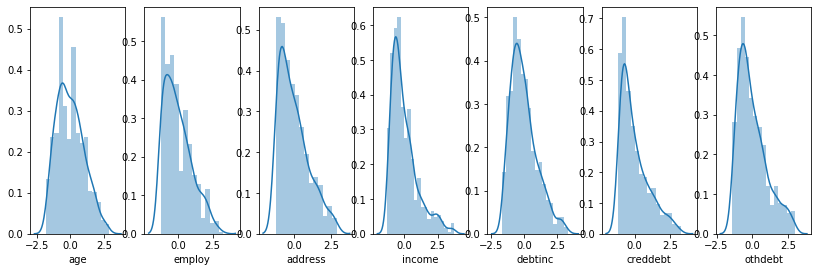

In [24]:
#To check distribution-Skewness
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sb.distplot(bankdata[l[i]],kde=True) 

In [25]:
bankdata

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
1,-0.866888,1,0.561753,-0.234455,-0.233258,1.620037,0.615319,1.547493,0.0
2,0.884568,1,1.470592,1.078692,1.173720,-0.603701,-0.054256,0.182424,0.0
4,-1.271070,2,-0.892390,-1.219316,-0.409130,1.620037,1.177877,0.843871,1.0
5,1.019295,2,-0.347087,-0.398599,-0.585002,0.282025,-0.667272,0.173761,0.0
7,1.288750,1,0.925288,0.586262,0.177111,-0.961761,-1.016670,-0.510230,0.0
...,...,...,...,...,...,...,...,...,...
844,-1.405797,1,-0.710622,-0.562742,-1.288492,-1.055987,-1.126544,-1.167436,0.0
845,0.076204,1,0.925288,1.242835,-0.174634,-1.131368,-0.870174,-0.968317,0.0
847,1.962387,1,1.107056,0.586262,0.177111,0.395097,-0.231226,1.086152,0.0
848,0.210931,2,-1.074158,0.586262,-0.643627,-0.170261,-0.634521,-0.349916,0.0


In [26]:
#Skewness Test
from scipy.stats import skew
for x in num_cname:
    print(x)
    skew_test = skew(bankdata.loc[:,x])
    print(skew_test)

age
0.4493870139122009
employ
0.7716341018676758
address
0.8716763257980347
income
1.3585400581359863
debtinc
0.8716152310371399
creddebt
1.1178762912750244
othdebt
0.947480320930481


### Sampling and Data modeling ###

In [27]:
#now divide data for training and testing 
bank = bankdata.copy()
X = bank.drop(['default'],axis=1) 
Y = bank['default']


In [28]:
X

,age,ed,employ,address,income,debtinc,creddebt,othdebt
1,-0.866888,1,0.561753,-0.234455,-0.233258,1.620037,0.615319,1.547493
2,0.884568,1,1.470592,1.078692,1.173720,-0.603701,-0.054256,0.182424
4,-1.271070,2,-0.892390,-1.219316,-0.409130,1.620037,1.177877,0.843871
5,1.019295,2,-0.347087,-0.398599,-0.585002,0.282025,-0.667272,0.173761
7,1.288750,1,0.925288,0.586262,0.177111,-0.961761,-1.016670,-0.510230
...,...,...,...,...,...,...,...,...
844,-1.405797,1,-0.710622,-0.562742,-1.288492,-1.055987,-1.126544,-1.167436
845,0.076204,1,0.925288,1.242835,-0.174634,-1.131368,-0.870174,-0.968317
847,1.962387,1,1.107056,0.586262,0.177111,0.395097,-0.231226,1.086152
848,0.210931,2,-1.074158,0.586262,-0.643627,-0.170261,-0.634521,-0.349916


In [29]:
Y

1      0.0
2      0.0
4      1.0
5      0.0
7      0.0
      ... 
844    0.0
845    0.0
847    0.0
848    0.0
849    0.0
Name: default, Length: 663, dtype: float64

In [30]:
# Splitting the dataset into 80% training data and 20% testing data.
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)# Splitting the dataset into 80% training data and 20% testing data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)

In [31]:
X_train

,age,ed,employ,address,income,debtinc,creddebt,othdebt
739,-1.271070,1,-0.528854,-1.055172,-0.702251,-0.716773,-0.866235,-0.774554
345,-0.462705,1,-1.255926,0.093831,-0.936747,1.488121,-0.360626,0.451122
246,0.749841,1,1.470592,1.406978,0.235735,-1.300975,-1.001978,-1.014793
652,-0.462705,1,0.925288,0.422118,0.177111,-0.038344,-0.960316,0.845545
683,-1.675252,1,-1.074158,-1.055172,-1.112619,-0.452939,-1.000097,-0.787829
...,...,...,...,...,...,...,...,...
13,0.480386,1,-0.165319,0.257975,-0.350506,1.431585,1.083241,0.809992
447,1.154023,1,0.016449,0.750405,-0.585002,0.282025,0.968872,-0.747835
232,0.615113,2,0.198217,1.406978,0.177111,-1.527118,-1.147879,-1.285824
800,-1.271070,1,-1.074158,-0.398599,-1.112619,0.093573,-0.941422,-0.475117


In [32]:
Y_test

526    0.0
372    0.0
19     0.0
816    0.0
92     0.0
      ... 
799    0.0
620    0.0
123    1.0
285    0.0
182    0.0
Name: default, Length: 133, dtype: float64

In [33]:
Y_train

739    0.0
345    1.0
246    0.0
652    0.0
683    0.0
      ... 
13     0.0
447    0.0
232    0.0
800    0.0
713    0.0
Name: default, Length: 530, dtype: float64

## Modeling ###

In [34]:
# Defining confusion metrics
def error_metric(CM): 
    
    TN = CM.iloc[0,0]
    FN = CM.iloc[1,0]
    TP = CM.iloc[1,1]
    FP = CM.iloc[0,1]
    precision =(TP)/(TP+FP)
    accuracy_model  =(TP+TN)/(TP+TN+FP+FN)*100
    recall_score  =(TP)/(TP+FN)
    specificity_value =(TN)/(TN + FP)
    False_positive_rate =(FP)/(FP+TN)
    False_negative_rate =(FN)/(FN+TP)
    f1_score =2*(( precision * recall_score)/( precision + recall_score))
    print("Precision value of the model: ",precision)
    print("Accuracy of the model: ",accuracy_model)
    print("Recall value of the model: ",recall_score)
    print("Specificity of the model: ",specificity_value)
    print("False Positive rate of the model: ",False_positive_rate)
    print("False Negative rate of the model: ",False_negative_rate)
    print("f1 score of the model: ",f1_score)
    
    

In [35]:
def ROC_curve(y_act ,y_pred) :
    FPR,TPR,thresholds=roc_curve(y_act ,y_pred)
    plt.plot(FPR,TPR)
    plt.title('ROC curve of the model')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    AUC = auc(FPR,TPR)
    print("AUC value of the model: %.2f"%AUC)
    

In [36]:
def Precision_recall_curve(y_act ,y_pred) :
    recall,precision,thresholds=precision_recall_curve(y_act ,y_pred)
    plt.plot(recall,precision)
    plt.title('Precision-Recall curve of the model')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

### Logistic Regression

Precision value of the model:  0.4055299539170507
Accuracy of the model:  71.1320754716981
Recall value of the model:  0.7857142857142857
Specificity of the model:  0.6913875598086124
False Positive rate of the model:  0.30861244019138756
False Negative rate of the model:  0.21428571428571427
f1 score of the model:  0.5349544072948329


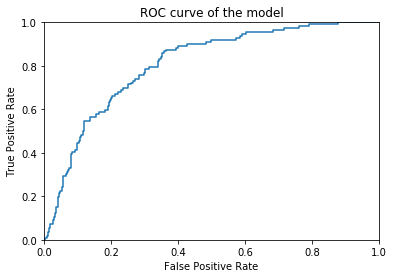

AUC value of the model: 0.81


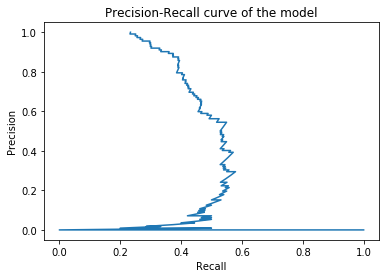

In [37]:
# Logistic Regression

logistic_model = LogisticRegression(class_weight='balanced' , random_state=0).fit(X_train,Y_train)
target_predict = logistic_model.predict(X_train)
targetclass_prob = logistic_model.predict_proba(X_train)[:, 1]
confusion_matrix = pd.crosstab(Y_train,target_predict)
error_metric(confusion_matrix)
ROC_curve(Y_train,targetclass_prob)
Precision_recall_curve(Y_train,targetclass_prob)

### Random Forest

Precision value of the model:  0.4055299539170507
Accuracy of the model:  71.1320754716981
Recall value of the model:  0.7857142857142857
Specificity of the model:  0.6913875598086124
False Positive rate of the model:  0.30861244019138756
False Negative rate of the model:  0.21428571428571427
f1 score of the model:  0.5349544072948329


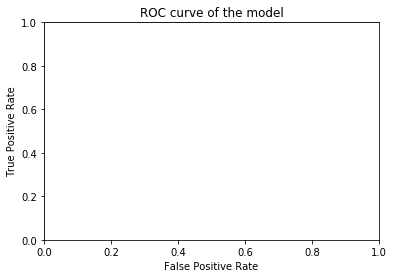

AUC value of the model: 1.00


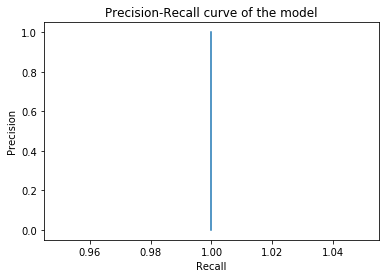

In [38]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier().fit(X_train, Y_train)
target_predict = RF_model.predict(X_test)
targetclass_prob = RF_model.predict_proba(X_train)[:, 1]
#confusion_matrix = pd.crosstab(Y_train,target_predict)
error_metric(confusion_matrix)
ROC_curve(Y_train,targetclass_prob)
Precision_recall_curve(Y_train,targetclass_prob)

### Decision Tree 

Precision value of the model:  0.4810810810810811
Accuracy of the model:  77.54716981132076
Recall value of the model:  0.7946428571428571
Specificity of the model:  0.7703349282296651
False Positive rate of the model:  0.22966507177033493
False Negative rate of the model:  0.20535714285714285
f1 score of the model:  0.5993265993265993


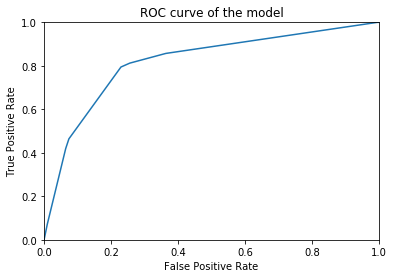

AUC value of the model: 0.82


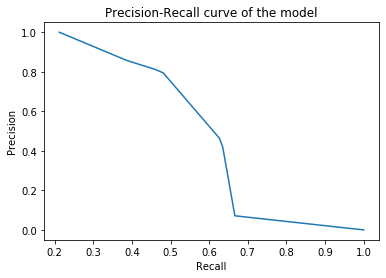

In [39]:
#Decision Trees
decision_model = DecisionTreeClassifier(max_depth=3 ,class_weight='balanced' ,random_state =0).fit(X_train,Y_train)
target_predict = decision_model.predict(X_train)
targetclass_prob = decision_model.predict_proba(X_train)[:, 1]
confusion_matrix = pd.crosstab(Y_train,target_predict)
error_metric(confusion_matrix)
ROC_curve(Y_train,targetclass_prob)
Precision_recall_curve(Y_train,targetclass_prob)

### XGboost model

In [40]:
xgb_model = XGBClassifier(max_depth=5,scale_pos_weight=2,learning_rate=0.1)

In [41]:
X_train = X_train.astype('float32')
Y_train = Y_train.astype('float32')
xgb_model.fit(X_train,Y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=2, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Precision value of the model:  0.4810810810810811
Accuracy of the model:  77.54716981132076
Recall value of the model:  0.7946428571428571
Specificity of the model:  0.7703349282296651
False Positive rate of the model:  0.22966507177033493
False Negative rate of the model:  0.20535714285714285
f1 score of the model:  0.5993265993265993


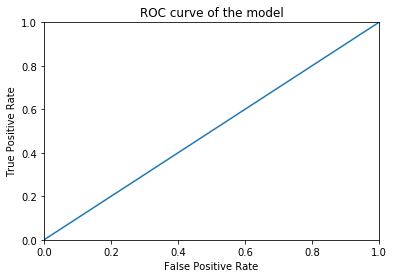

AUC value of the model: 0.50


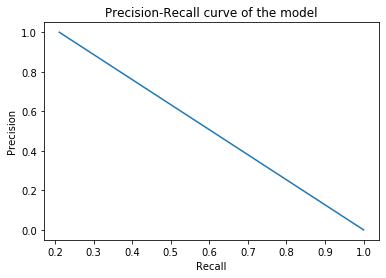

In [42]:
target_predict = xgb_model.predict(X_train)
targetclass_prob = xgb_model.predict_proba(X_train)[:,1]
target_predict = target_predict.astype('int64')
targetclass_prob = targetclass_prob.astype('int64')
#confusion_matrix = pd.crosstab(X_train,target_predict)
error_metric(confusion_matrix)
ROC_curve(Y_train,targetclass_prob)
Precision_recall_curve(Y_train,targetclass_prob)

Model Selection 
Now,here we have selected fianl  model

In [43]:
Result = pd.DataFrame({'Actual_target': Y_train, 'Predicted_target':target_predict})

In [44]:
Result.to_csv("PREDICTION_PYTHON.csv",index=False)